<a href="https://colab.research.google.com/github/raissalohanna/Doutorado/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA of new extraction of PubChemQC**

**Responsible** for the extraction: Vinicius Ávila
**Date of extraction**: March 2023

**Objective**: Make an exploratory data analysis (EDA) of the data

**Details**: available at the README file

# Drive - Colab configuration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 48.2 MB/s eta 0:00:00


# Importing libraries and configuration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt

In [ ]:
from tqdm import tqdm

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(10, 5)})

Load data

In [ ]:
df_smiles = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/Doutorado/PubchemQC_nova_base/selected_smiles.parquet")

In [ ]:
df_properties = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/Doutorado/PubchemQC_nova_base/selected_qm_properties.parquet")

In [ ]:
df_transitions = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/Doutorado/PubchemQC_nova_base/selected_transitions_energies.parquet")

# Df smiles

In [ ]:
df_smiles = df_smiles.reset_index()

In [ ]:
df_smiles

,cid,smiles,smiles source
0,3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,PubChemQC
1,4,C[C@H](O)CN,PubChemQC
2,5,NCC(=O)COP(=O)(O)O,PubChemQC
3,6,O=[N+]([O-])c1ccc(Cl)c([N+](=O)[O-])c1,PubChemQC
4,7,CCn1cnc2c(N)ncnc21,PubChemQC
...,...,...,...
2365695,75276551,C/C(=N/N[C@@H](N)S)c1ccccn1,PubChemQC
2365696,75276555,CN[C@@H](S)N/N=C(/C)c1ccccn1,PubChemQC
2365697,75277118,C=CCN(/C=C/c1ccccc1Cl)C(C)=O,PubChemQC
2365698,75277120,C=CCN(/C=C/c1ccccc1C)C(C)=O,PubChemQC


In [ ]:
df_smiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365700 entries, 0 to 2365699
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   cid            int64 
 1   smiles         object
 2   smiles source  object
dtypes: int64(1), object(2)
memory usage: 54.1+ MB


In [ ]:
df_smiles.isnull().sum()

cid              0
smiles           0
smiles source    0
dtype: int64

In [ ]:
df_smiles['cid'].duplicated().sum()

0

In [ ]:
df_smiles['smiles'].duplicated().sum()

103331

In [ ]:
df_smiles['smiles source'].value_counts()

PubChemQC    2365700
Name: smiles source, dtype: int64

# Df properties

In [ ]:
df_properties = df_properties.reset_index()

In [ ]:
new_col_names = dict(zip(df_properties.columns,["_".join(col.split()) for col in df_properties.columns]))
new_col_names

{'cid': 'cid',
 'charge': 'charge',
 'total dipole moment': 'total_dipole_moment',
 'multiplicity': 'multiplicity',
 'homo': 'homo',
 'lumo': 'lumo',
 'gap': 'gap',
 'total energy': 'total_energy'}

In [ ]:
df_properties = df_properties.rename(columns=new_col_names)

In [ ]:
df_properties.head()

,cid,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy
0,3,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068
1,4,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860
2,5,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704
3,6,0,4.157554,1,-8.149810,-3.246318,4.903492,-29955.022787
4,7,0,2.775867,1,-5.823236,-0.389123,5.434114,-14856.035269


In [ ]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365700 entries, 0 to 2365699
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   cid                  int64  
 1   charge               int64  
 2   total_dipole_moment  float64
 3   multiplicity         int64  
 4   homo                 float64
 5   lumo                 float64
 6   gap                  float64
 7   total_energy         float64
dtypes: float64(5), int64(3)
memory usage: 144.4 MB


In [ ]:
df_properties.isnull().sum()

cid                    0
charge                 0
total_dipole_moment    0
multiplicity           0
homo                   0
lumo                   0
gap                    0
total_energy           0
dtype: int64

<Axes: title={'center': 'total_energy'}, ylabel='Frequency'>

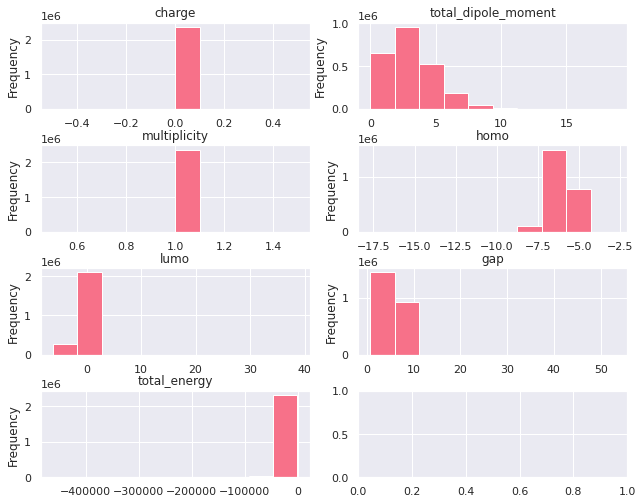

In [ ]:
# PLOTS - Properties
fig, axs = plt.subplots(4,2, figsize=(9,7))
fig.tight_layout()

df_properties['charge'].plot.hist( ax=axs[0,0], title='charge')
df_properties['total_dipole_moment'].plot.hist( ax=axs[0,1], title='total_dipole_moment')
df_properties['multiplicity'].plot.hist( ax=axs[1,0], title='multiplicity')
df_properties['homo'].plot.hist( ax=axs[1,1], title='homo')
df_properties['lumo'].plot.hist( ax=axs[2,0], title='lumo')
df_properties['gap'].plot.hist( ax=axs[2,1], title='gap')
df_properties['total_energy'].plot.hist( ax=axs[3,0], title='total_energy')

# Df transitions

In [ ]:
df_transitions.head()

,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,
3,32576.410766,0.053438,34937.703709,0.127298,35191.469929,0.035610,38959.724483,0.045520,45869.452080,0.002901,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,45133.600212,0.003867,50498.445390,0.022722,52102.569231,0.001101,53565.199229,0.044094,54291.396641,0.024346,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,34507.648887,0.001015,41628.443712,0.008713,45462.755074,0.001559,46943.403498,0.000598,48366.754296,0.003638,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173
6,30008.462447,0.008708,30033.272061,0.003050,33529.032202,0.020309,33901.611955,0.001681,34123.341833,0.005520,35756.461306,0.200556,36520.961987,0.046772,38970.830737,0.019129,39701.819082,0.000927,40475.820974,0.073291
7,39855.991961,0.190582,40311.404854,0.020937,42125.119929,0.037105,43694.465144,0.011508,45023.182910,0.001745,45422.403156,0.002244,47443.717276,0.000626,48595.614115,0.159045,48912.840038,0.016330,49181.261352,0.015406


In [ ]:
df_transitions = df_transitions.reset_index()

In [ ]:
df_transitions.shape

(2365313, 21)

In [ ]:
df_transitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365313 entries, 0 to 2365312
Data columns (total 21 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cid       int64  
 1   TD_ET_00  float64
 2   TD_OS_00  float64
 3   TD_ET_01  float64
 4   TD_OS_01  float64
 5   TD_ET_02  float64
 6   TD_OS_02  float64
 7   TD_ET_03  float64
 8   TD_OS_03  float64
 9   TD_ET_04  float64
 10  TD_OS_04  float64
 11  TD_ET_05  float64
 12  TD_OS_05  float64
 13  TD_ET_06  float64
 14  TD_OS_06  float64
 15  TD_ET_07  float64
 16  TD_OS_07  float64
 17  TD_ET_08  float64
 18  TD_OS_08  float64
 19  TD_ET_09  float64
 20  TD_OS_09  float64
dtypes: float64(20), int64(1)
memory usage: 379.0 MB


In [ ]:
df_transitions.isnull().sum()

cid          0
TD_ET_00     0
TD_OS_00     1
TD_ET_01     4
TD_OS_01     5
TD_ET_02     4
TD_OS_02     5
TD_ET_03     4
TD_OS_03     5
TD_ET_04     8
TD_OS_04     9
TD_ET_05    11
TD_OS_05    11
TD_ET_06    11
TD_OS_06    11
TD_ET_07    11
TD_OS_07    11
TD_ET_08    11
TD_OS_08    11
TD_ET_09    21
TD_OS_09    21
dtype: int64

<Axes: ylabel='Frequency'>

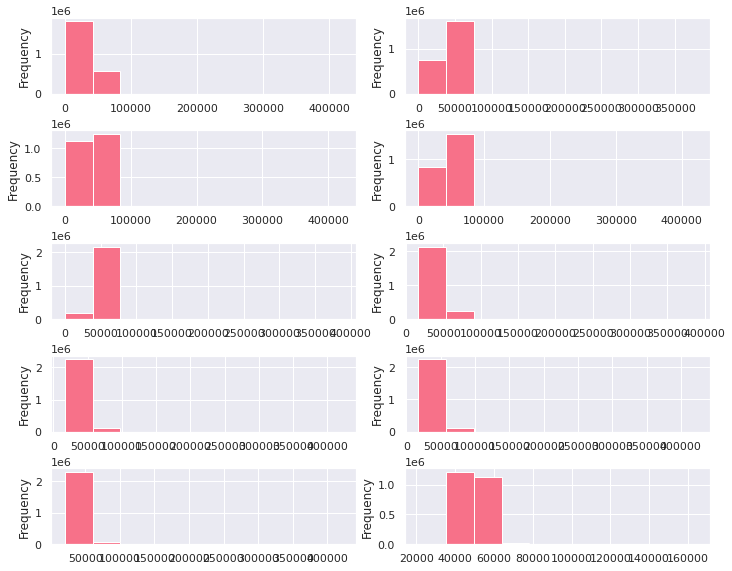

In [ ]:
# PLOTS - Excitation energies
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.tight_layout()

df_transitions['TD_ET_00'].plot.hist( ax=axs[0,0])
df_transitions['TD_ET_01'].plot.hist( ax=axs[0,1])
df_transitions['TD_ET_02'].plot.hist( ax=axs[1,0])
df_transitions['TD_ET_03'].plot.hist( ax=axs[1,1])
df_transitions['TD_ET_04'].plot.hist( ax=axs[2,0])
df_transitions['TD_ET_05'].plot.hist( ax=axs[2,1])
df_transitions['TD_ET_06'].plot.hist( ax=axs[3,0])
df_transitions['TD_ET_07'].plot.hist( ax=axs[3,1])
df_transitions['TD_ET_08'].plot.hist( ax=axs[4,0])
df_transitions['TD_ET_09'].plot.hist( ax=axs[4,1])

<Axes: ylabel='Frequency'>

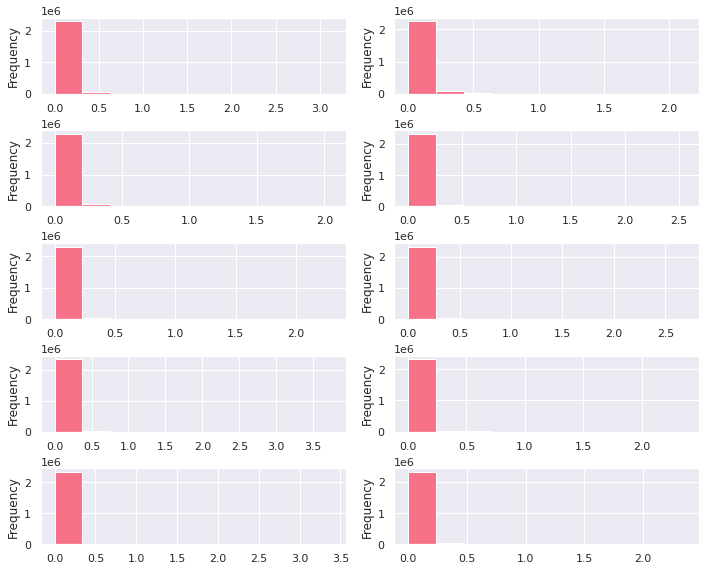

In [ ]:
# PLOTS - Oscillator forces
fig, axs = plt.subplots(5,2, figsize=(10,8))
fig.tight_layout()

df_transitions['TD_OS_00'].plot.hist( ax=axs[0,0])
df_transitions['TD_OS_01'].plot.hist( ax=axs[0,1])
df_transitions['TD_OS_02'].plot.hist( ax=axs[1,0])
df_transitions['TD_OS_03'].plot.hist( ax=axs[1,1])
df_transitions['TD_OS_04'].plot.hist( ax=axs[2,0])
df_transitions['TD_OS_05'].plot.hist( ax=axs[2,1])
df_transitions['TD_OS_06'].plot.hist( ax=axs[3,0])
df_transitions['TD_OS_07'].plot.hist( ax=axs[3,1])
df_transitions['TD_OS_08'].plot.hist( ax=axs[4,0])
df_transitions['TD_OS_09'].plot.hist( ax=axs[4,1])

# Joining datasets 

per cid index

In [ ]:
df_smiles = df_smiles.set_index('cid')
df_properties = df_properties.set_index('cid')
df_transitions = df_transitions.set_index('cid')

In [ ]:
df_joined = df_smiles.join((df_properties.join(df_transitions, on='cid', how='left')), on='cid', how='left')

In [ ]:
df_joined.head()

,smiles,smiles source,charge,total_dipole_moment,multiplicity,homo,lumo,gap,total_energy,TD_ET_00,TD_OS_00,TD_ET_01,TD_OS_01,TD_ET_02,TD_OS_02,TD_ET_03,TD_OS_03,TD_ET_04,TD_OS_04,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,O=C(O)C1=CC=C[C@H](O)[C@H]1O,PubChemQC,0,5.266252,1,-6.821894,-2.239497,4.582397,-15575.874068,32576.410766,0.053438,34937.703709,0.127298,35191.469929,0.035610,38959.724483,0.045520,45869.452080,0.002901,46837.502902,0.004995,48214.775245,0.008408,48851.170886,0.003279,50890.898644,0.046370,51729.941085,0.009966
4,C[C@H](O)CN,PubChemQC,0,2.681395,1,-6.187869,1.847653,8.035522,-6794.535860,45133.600212,0.003867,50498.445390,0.022722,52102.569231,0.001101,53565.199229,0.044094,54291.396641,0.024346,58571.208342,0.009868,60147.530252,0.014954,60319.624771,0.008397,60994.089781,0.004093,62458.026397,0.000847
5,NCC(=O)COP(=O)(O)O,PubChemQC,0,8.447997,1,-7.270882,-1.529280,5.741602,-24256.843704,34507.648887,0.001015,41628.443712,0.008713,45462.755074,0.001559,46943.403498,0.000598,48366.754296,0.003638,50735.499802,0.000874,53071.087855,0.009599,54805.905776,0.025285,54979.815042,0.000488,55740.210361,0.013173
6,O=[N+]([O-])c1ccc(Cl)c([N+](=O)[O-])c1,PubChemQC,0,4.157554,1,-8.149810,-3.246318,4.903492,-29955.022787,30008.462447,0.008708,30033.272061,0.003050,33529.032202,0.020309,33901.611955,0.001681,34123.341833,0.005520,35756.461306,0.200556,36520.961987,0.046772,38970.830737,0.019129,39701.819082,0.000927,40475.820974,0.073291
7,CCn1cnc2c(N)ncnc21,PubChemQC,0,2.775867,1,-5.823236,-0.389123,5.434114,-14856.035269,39855.991961,0.190582,40311.404854,0.020937,42125.119929,0.037105,43694.465144,0.011508,45023.182910,0.001745,45422.403156,0.002244,47443.717276,0.000626,48595.614115,0.159045,48912.840038,0.016330,49181.261352,0.015406


In [ ]:
df_joined.shape

(2365700, 29)

In [ ]:
df_joined.isnull().sum()

smiles                   0
smiles source            0
charge                   0
total_dipole_moment      0
multiplicity             0
homo                     0
lumo                     0
gap                      0
total_energy             0
TD_ET_00               387
TD_OS_00               388
TD_ET_01               391
TD_OS_01               392
TD_ET_02               391
TD_OS_02               392
TD_ET_03               391
TD_OS_03               392
TD_ET_04               395
TD_OS_04               396
TD_ET_05               398
TD_OS_05               398
TD_ET_06               398
TD_OS_06               398
TD_ET_07               398
TD_OS_07               398
TD_ET_08               398
TD_OS_08               398
TD_ET_09               408
TD_OS_09               408
dtype: int64

In [ ]:
df_joined.to_parquet('joined_data.parquet')